In [5]:
import os
import json
import numpy as np
import matplotlib.pylab as plt

{'domains': [{'display_name': 'Health Sciences', 'id': 4}, {'display_name': 'Life Sciences', 'id': 1}, {'display_name': 'Engineering and Computer Science', 'id': -2}, {'display_name': 'Physical Sciences', 'id': 3}, {'display_name': 'Social Sciences', 'id': 2}, {'display_name': 'All', 'id': -1}], 'year_begin': 1990, 'year_end': 2030}


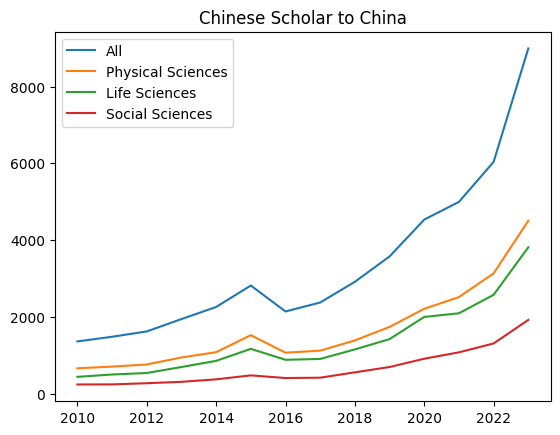

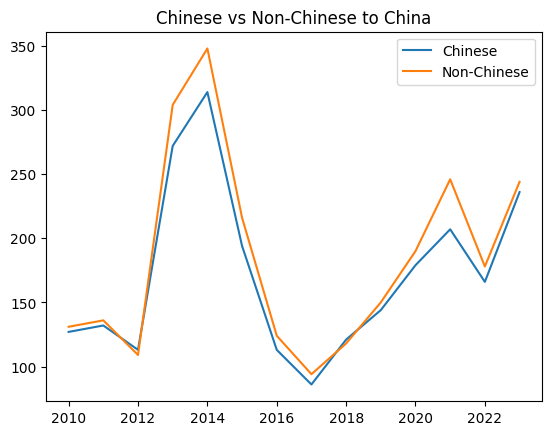

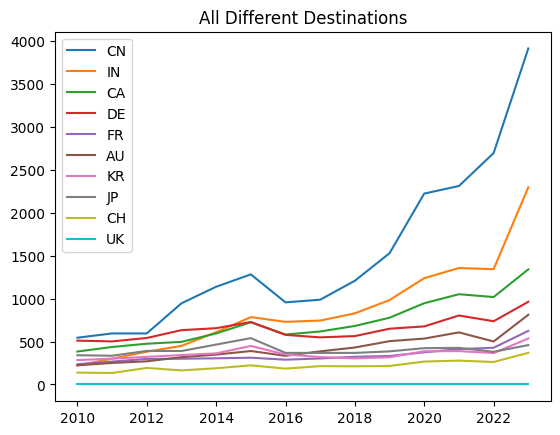

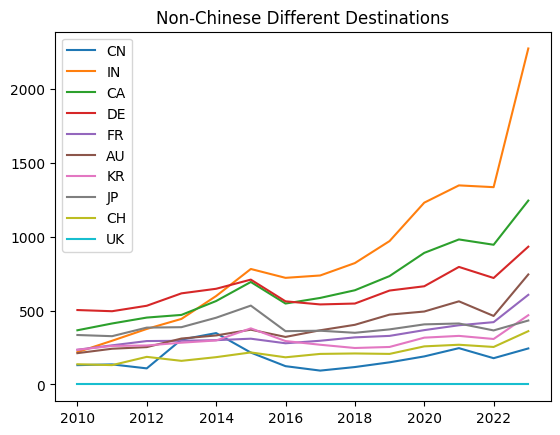

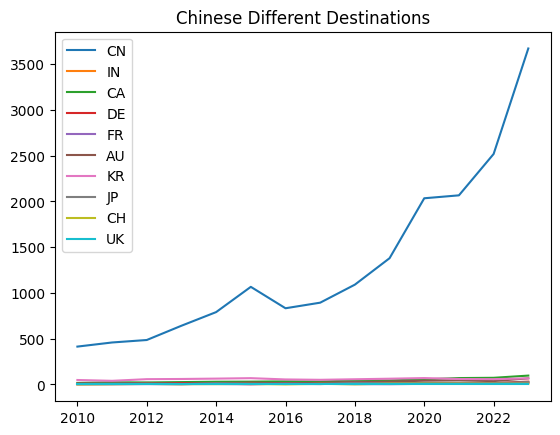

In [12]:
LABELS = [
    'All',
    'Physical Sciences',
    'Life Sciences',
    'Social Sciences'
]

COUNTRIES = ['US','CN','IN','CA','DE','FR','AU','KR','JP','CH','UK','other'];

ORDER_COUNTRIES = ['CN','IN','CA','DE','FR','AU','KR','JP','CH', 'UK', 'other']

lookup = {}
for i, v in enumerate(COUNTRIES):
    lookup[v] = i

ORDER = [lookup[v] for v in ORDER_COUNTRIES]

del lookup

# npy
# is_chinese
# year
# destination
class Analyze:
    def __init__ (self, root, year_begin, year_end):
        with open(os.path.join(root, 'meta.json'), 'r') as f:
            meta = json.load(f)
        self.meta = meta
        counts = np.load(os.path.join(root, 'counts.npy'))
        assert counts.shape[-1] == len(COUNTRIES)
        print(meta)
        #print(counts.shape)
        self.offset = meta['year_begin']
        begin = year_begin - self.offset    
        end = year_end - self.offset
        self.counts = counts[:, :, begin:end, :]
        self.year_begin = year_begin
        self.year_end = year_end
        self.X = np.arange(year_begin, year_end)        

    def plot_chinese_to_china (self):
        plt.figure()
        plt.title("Chinese Scholar to China")
        for label in LABELS:
            for i, domain in enumerate(self.meta['domains']):
                if label == domain['display_name']:
                    break
            assert label == domain['display_name']
            plt.plot(self.X, self.counts[i, 1, :, 1], label=label)
        plt.legend()

    def plot_chinese_vs_non_chinese (self):
        plt.figure()
        plt.title("Chinese vs Non-Chinese to China")
        plt.plot(self.X, self.counts[1, 0, :, 1], label="Chinese")
        plt.plot(self.X, self.counts[0, 0, :, 1], label="Non-Chinese")        
        plt.legend()

    def plot_all_to_destinations (self, yesno, title):
        plt.figure()
        plt.title(title)
        if yesno is None:
            counts = np.sum(self.counts, 1)
        else:
            counts = self.counts[:, yesno, :, :]
        for i in ORDER:
            dest = COUNTRIES[i]
            plt.plot(self.X, counts[0, :, i], label=dest)
        plt.legend()        
        
anal = Analyze('count_all', 2010, 2024)
anal.plot_chinese_to_china()
anal.plot_chinese_vs_non_chinese()
anal.plot_all_to_destinations(None, "All Different Destinations")
anal.plot_all_to_destinations(0, "Non-Chinese Different Destinations")
anal.plot_all_to_destinations(1, "Chinese Different Destinations")
